In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score

In [45]:
data = sns.load_dataset('iris')

In [46]:
data = data[data['species'] != 'virginica']

In [47]:
le = LabelEncoder()
data['species'] = le.fit_transform(data['species'])

In [48]:
data['species'] = le.fit_transform(data['species'])

In [49]:
X = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
Y = data['species'].values.reshape(-1, 1)

In [50]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=4)

In [51]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
X_train = np.hstack((X_train_scaled, np.ones((X_train_scaled.shape[0], 1))))
X_test = np.hstack((X_test_scaled, np.ones((X_test_scaled.shape[0], 1))))

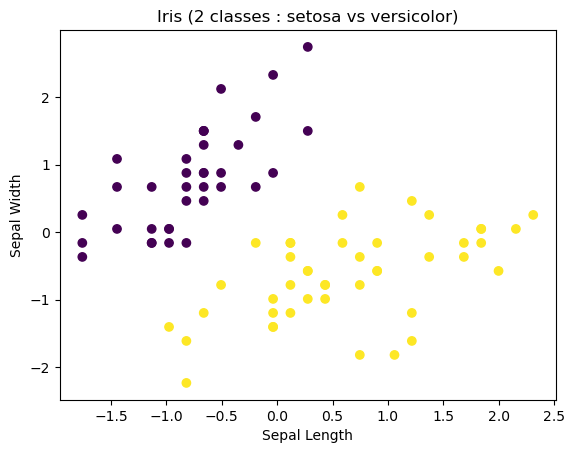

In [53]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap='viridis')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Iris (2 classes : setosa vs versicolor)')
plt.show()

In [54]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [55]:
def model(X, theta):
    return sigmoid(X.dot(theta))

In [56]:
def cost_function(X, y, theta):
    m = len(y)
    A = model(X, theta)
    A = np.clip(A, 1e-15, 1 - 1e-15)   # Empêche log(0) ou log(1)
    return -1/m * np.sum(y * np.log(A) + (1 - y) * np.log(1 - A))

In [57]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [58]:
def gradient_descent(X, y, learning_rate, n_iterations):
    theta = np.random.randn(X.shape[1], 1)
    cost_history = np.zeros(n_iterations)
    for i in range(n_iterations):
        theta -= learning_rate * grad(X, y, theta)
        cost_history[i] = cost_function(X, y, theta)
    return theta, cost_history

In [59]:
theta, cost_history = gradient_descent(X_train, Y_train, learning_rate=0.1, n_iterations=1000)

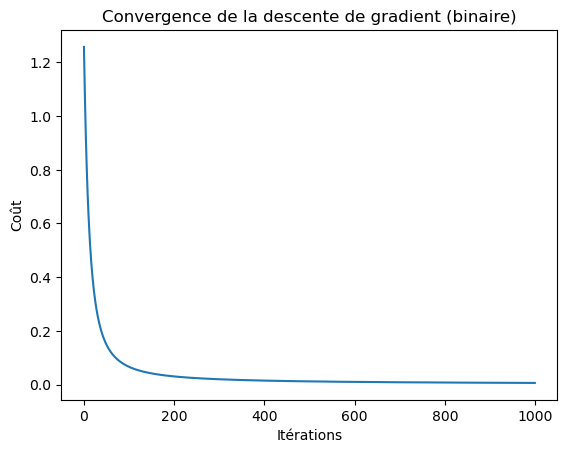

In [60]:
plt.plot(range(len(cost_history)), cost_history)
plt.xlabel("Itérations")
plt.ylabel("Coût")
plt.title("Convergence de la descente de gradient (binaire)")
plt.show()

In [61]:
pred_train = (model(X_train, theta) >= 0.5).astype(int)
pred_test  = (model(X_test, theta) >= 0.5).astype(int)

In [62]:
print("Accuracy sur le train:", accuracy_score(Y_train, pred_train))
print("Accuracy sur le test :", accuracy_score(Y_test, pred_test))

Accuracy sur le train: 1.0
Accuracy sur le test : 1.0


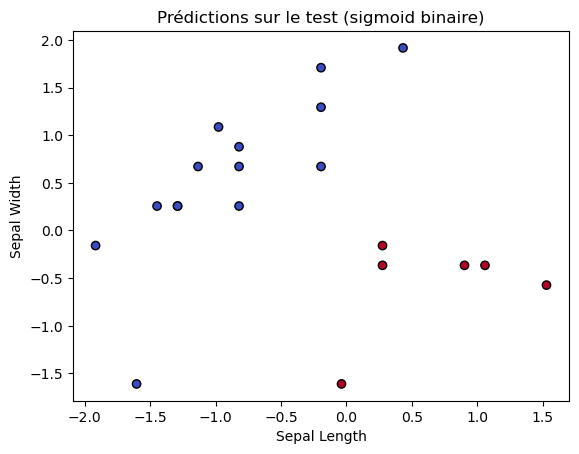

In [63]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=pred_test, cmap='coolwarm', edgecolors='k')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('Prédictions sur le test (sigmoid binaire)')
plt.show()